# Project

This assessment is marked out of 100 and comprises 30% of the final course mark.

Your project takes the form of a single Jupyter notebook, using this notebook as model. Your answers to theoretical questions and your discussions of results should be entered in Markdown cells. Mardown cells support basic LaTex and you should use this for formulas. (To edit a cell, double click on it; to render it, press shift+enter or run.) The rest should be code cells and their output. Your code must generate and display all relevant output when run.

### Submission

The project is **due by 4pm on Friday November 17th 2023** (Week 9), to be submitted on Gradescope (DO NOT submit on Noteable).

**Follow these instructions scrupulously:**

1. To mimise the size of your notebook, do not include this preamble or the questions (you can start adding material to this notebook, then remove the preamble and questions to leave only your (numbered) answers, code and output).
1. When your notebook is ready, run all the cells to make sure that the output is updated and displayed.
2. Save a pdf version of the entire notebook. This shoud be a printable version in a single file, with individual pages (not a single long page). To obtain this, the safest way is to use 'print preview' on Noteable, then you use your browser to 'print as pdf' or 'save as pdf'. (Noteable has the option 'save as pdf' which produces a nice pdf when it works, but it is very buggy.) Avoid long lines of code which can get truncated in the pdf (you can write python statements over multiple lines using a backslash at the end of each line).
3. Submit your pdf on Gradescope using the assignment 'Project (your pdf file)'. Please **tag your pages** with the relevant questions in Gradescope.
4. Submit also your Jupyter .ipynb file on Gradescope using the other assignment 'Project (Jupyter notebooks, your .ipynb files only)'. We will  mark the pdf files and use only the .pynb in case of issues with the pdf.

### Academic misconduct

This assessment is summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not copy the work of another student or show your own work to another student.**

If you use any resources (e.g. textbooks or websites), then you must include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be commented, with the functionality of each non-trivial line of code explained. This is to test your understanding of the code you have written. Up to a quarter of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

The following provides an example of the expected level of commenting.

In [1]:
def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k 
                                                     # from row j to create zeros 
                                                     # below the diagonal in column k
    
    return L, U # return the LU factorisation of A

### Re-using code and built-in functions

You can re-use your own code from previous workshops. You can also use the model solutions for computer lab exercises posted on Learn, and Jupyter notebooks from lecture material posted on Learn. You do NOT need to comment re-used code, but you should clearly indicate from where you have taken the code.

Unless indicated otherwise, you may use any built-in Python functions as required, including numpy and scipy functions.

### Code efficiency

To obtain full marks, your code should be *efficient* in the sense of avoiding unnecessary artihmetic operations and having low computational cost. 



## Question 1: Tridiagonal systems (30 marks)

Tridiagonal matrices $\mathbf{A} \in \mathbb{R}^n$ have the form
$$
\mathbf{A} = 
\begin{bmatrix}
b_1 & c _1  &  &  &  \\
a_2 & b_2 & c_2  &  &  \\
  & \ddots & \ddots &  \ddots &  \\
&  &  a_{n-1} & b_{n-1} & c_{n-1} \\
  &  &  & a_n & b_n
\end{bmatrix}.
$$
They have a LU factorisation $\mathbf{A} = \mathbf{L} \mathbf{U}$ with
$$
\mathbf{L} = \begin{bmatrix}
1 & 0 & & \\ l_2 & 1 & \ddots &   \\
& \ddots & \ddots  & 0 \\
& & l_n & 1
\end{bmatrix}
\quad \textrm{and} \quad 
\mathbf{U} = 
\begin{bmatrix}
u_{1} & v_1 & & \\
0 & u_{2} & \ddots &   \\
& \ddots & \ddots  & v_{n-1} \\
& & 0& u_{n}
\end{bmatrix}.
$$



**1(a)** Write down pseudo-code for an algorithm  LU-TRI computing the LU factorisation of a tridiagonal matrix. The algorithm should take as input the vectors 
$$
\mathbf{a} = [a_2,\cdots, a_{n}] \in \mathbb{R}^{n-1}, \ \ \mathbf{b} = [b_1,\cdots, b_{n}] \in \mathbb{R}^n, \ \ \mathbf{c} = [c_1,\cdots, c_{n-1}] \in \mathbb{R}^{n-1}
$$ 
and return as outputs the vectors 
$$
\mathbf{l} = [l_2,\cdots, l_{n}] \in \mathbb{R}^{n-1}, \ \ \mathbf{u} = [u_1,\cdots, u_{n}] \in \mathbb{R}^n, \ \ \mathbf{v} = [v_1,\cdots, v_{n-1}] \in \mathbb{R}^{n-1}
$$
without forming any matrices.
(Hint: Multiply the  matrices $\mathbf{L}$ and $\mathbf{U}$ to find equations for $u_{i}$, $v_{i}$, and $l_{i}$ involving the entries of $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$.)

**1(b)** Give the number of operations $C(n)$ required by your algorithm and compare it that of the standard LU factorisation. Justify your answer.

**1(c)** Write a function `LUtri` which implements your LU-TRI algorithm. Apply your function to the matrix
$$
\mathbf{A} = \begin{bmatrix} 2 & 1 & 0 \\ -1 & 3 & 1 \\ 0 & -2 & 1 \end{bmatrix}
$$
and display the result.
(Hint: you may find the function `np.diag` useful to extract the diagonal $\mathbf{b}$, subdiagonal $\mathbf{a}$ and superdiagonal $\mathbf{c}$ of $\mathbf{A}$ and to construct matrices with given (sub, super) diagonals.) 

**1(d)** Compare the efficiency of the algorithms LU-TRI and LU (as implemented in Computer Lab 3 and given above) by comparing the time they require to factorise large tridiagonal matrices (e.g. using random matrices).  

**1(e)** Write functions `FStri` and `BStri` implementing *efficient* algorithms for the solution of the linear systems $\mathbf{L} \mathbf{y} = \mathbf{r}$ and $\mathbf{U} \mathbf{x} = \mathbf{y}$ for $\mathbf{L}$ and $\mathbf{U}$ of the form above. Write a function `GEtri` solving $\mathbf{A} \mathbf{x} = \mathbf{r}$ for tridiagonal $\mathbf{A}$. Apply  `GEtri` to solve
$$
\begin{bmatrix} 1 & 2 & 0 & 0  \\ 1 & 1 & -1 & 0 \\ 0 & 3 & -2 & 1 \\ 0 & 0 & 1 & 3 \end{bmatrix} \mathbf{x} = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 4 \end{bmatrix}
$$
and display the result.

### Question 1: Answers

**1(a)** 
The code is based on the following pseudocode:

**LU-TRI:**

*Input*: $\bf{a}= [a_2,\cdots ,a_n] \in\mathbb{R}^{n-1}$ , $\bf{b}= [b_1,\cdots ,b_n] \in\mathbb{R}^{n}$, $\bf{c}= [c_1,\cdots ,c_{n-1}] \in\mathbb{R}^{n-1}$

*Output*: $\bf{l}= [l_2,\cdots ,l_n] \in\mathbb{R}^{n-1}$, $\bf{u}= [u_1,\cdots ,u_n] \in\mathbb{R}^{n}$, $\bf{v}= [v_1,\cdots ,v_{n-1}] \in\mathbb{R}^{n-1}$

[1] $\bf{v} = \bf{c}$

[2] $u_1 = b_1$

[3] For $k = 2, \dots, n$

[4] $\qquad l_k = \frac{a_k}{u_{k-1}}$

[5] $\qquad u_k = b_k - l_k v_{k-1}$

End For

**1(b)** 

 In line [4], we do 1 division and we loop this for n-1 times, so the total computational cost of line[4] is n-1. In line [5], we have 1 multiplication and 1 subtraction, which will loop n-1 times. Thus, the total compuational cost of line[5] is $2*(n-1)$. Therefore, the total computational cost for whole algorithm is $C(n) =  n - 1 + 2*(n - 1) = 3n - 3 = O(n) $. The computational cost of LU factorisation is $C(n) = \frac{2}{3}n^3 + \frac{1}{2} n^2 - \frac{7}{6}n$ from week 2 notes. Comparing these two methods, we can see that computational cost of LU factorisation with $O(n^3)$ is much larger than LU-TRI with $O(n)$.When n goes larger, the computational cost of LU factorisation will be extremely large.

In [2]:
#Question 1(c)
import numpy as np

# LU fractorization of a tridiagonal matrix
def LUtri(a, b, c):
    '''
    LU factorization of a tridiagonal matrix
    Input: a, b, c are the three diagonals of the matrix
    Output: l, u, v are the three diagonals of the LU factorization
    '''
    # Find dimension of A
    n = len(b)
    # let v = c
    v = c.copy()
    # Initialise l, u
    u = np.zeros(n)
    l = np.zeros(n-1)
    # find u_1 with index 0
    u[0] = b[0]
    # loop over k from 2 to n
    for k in range(2,n+1): 
        # find l_k for k = 2,...,n by solving l_k*u_{k-1} = a_k 
        # here the index of l_k is k-2, the index of u_{k-1} is k-2 and the index of a_k is k-2 
        l[k-2] = a[k-2]/u[k-2]   
        # find u_k for k = 2,...,n by solving u_k = b_k - l_k*v_{k-1}
        # here the index of u_k is k-1, the index of b_k is k-1, the index of l_k is k-2 
        # and the index of v_{k-1} is k-2
        u[k-1] = b[k-1] - l[k-2]*v[k-2]
    return l, u, v   # return the LU factorization of A with three diagonals

# Test LUtri by matrix A
A = np.array([[2, 1, 0], [-1, 3, 1], [0, -2, 1]], dtype = float)
# Extract the three diagonals
# a is the subdiagonal, b is the diagonal, c is the superdiagonal
a = np.diag(A, -1)
b = np.diag(A)
c = np.diag(A, 1)
# Find the LU factorization of A
l,u,v = LUtri(a, b, c)
# Print the results
print("l = " + str(l))
print("u = " + str(u))
print("v = " + str(v))

l = [-0.5        -0.57142857]
u = [2.         3.5        1.57142857]
v = [1. 1.]


In [3]:
#Question 1(d)
# Normal LU factorization
def LU(A):
    
    # Find dimension of A
    n = A.shape[0]
    
    # Initialise L=I, U=A
    L = np.eye(n) 
    U = np.copy(A)

    for k in range(n - 1): # loop over columns 1 to n-1
        for j in range(k + 1, n): # loop over rows k+1 to n
            L[j, k] = U[j, k] / U[k ,k] # compute the multiplier l_jk
            U[j, k:] = U[j, k:] - L[j, k] * U[k, k:] # subtract a multiple of row k 
                                                     # from row j to create zeros 
                                                     # below the diagonal in column k
    
    return L, U # return the LU factorisation of A

# generate a random tridiagonal matrix of dimension n
def random_tri(n):
    '''
    Generate a random tridiagonal matrix of dimension n
    Input: n is the dimension of the matrix
    Output: A is the random tridiagonal matrix
            a, b, c are the three diagonals of A
    '''
    # Generate random numbers of the three diagonals
    a = np.random.rand(n-1)
    b = np.random.rand(n)
    c = np.random.rand(n-1)
    # Generate the tridiagonal matrix by adding the three diagonals
    A = np.diag(a, k=-1) + np.diag(b, k=0) + np.diag(c, k=1)
    return A, a, b, c # return the random tridiagonal matrix and its three diagonals

import time
# Compare the efficiency of LU and LU_TRI
# initialise the list of time with LU and LU_TRI
t_LU = []
t_TRI = []
# loop over demension n = 100, 200, 400, 800, 1600, 3200
for i in [100, 200, 400, 800, 1600, 3200]:
    # generate a random tridiagonal matrix of dimension n
    A, a, b, c = random_tri(i)
    # record the start time of LU
    start = time.time()
    # using LU factorization of A
    L, U = LU(A)
    # record the end time of LU
    end = time.time()
    # add the time cost by LU to the list
    t_LU.append(end-start)
    # record the start time of LUtri
    start = time.time()
    # using LU_TRI factorization of A
    l, u, v = LUtri(a, b, c)
    # record the end time of LUtri
    end = time.time()
    # add the time cost by LUtri to the list
    t_TRI.append(end-start)
    # print the time cost by LU and LUtri with dimension n
    print("n = " + str(i) + ": LU = " + str(t_LU[-1]) + ", TRI = " + str(t_TRI[-1]))

n = 100: LU = 0.014620542526245117, TRI = 6.794929504394531e-05
n = 200: LU = 0.062081336975097656, TRI = 0.00013303756713867188
n = 400: LU = 0.25963282585144043, TRI = 0.0002701282501220703
n = 800: LU = 1.1839203834533691, TRI = 0.0005347728729248047
n = 1600: LU = 5.950209856033325, TRI = 0.0011570453643798828
n = 3200: LU = 34.77184176445007, TRI = 0.002259492874145508


We can see that the efficiency of TRI will be extremely large when n goes larger. We can see that when n = 3200, LU cost 34s and TRI cost 0.002287s, which 14912 times larger. Thus, TRI is more efficient than LU as n going larger.  

In [4]:
#Question 1(e)
def FStri(l, r):
    '''
    Forward substitution for a tridiagonal matrix
    Input: l is the sequence of subdiagonal of the lower matrix
           r is the right hand side vector
    Output: y is the solution vector
    '''
    # Find dimension of L
    n = len(r)
    # Initialise y
    y = np.zeros(n)
    # find y_1 with index 0
    y[0] = r[0]
    # loop over k from 1 to n-1
    for k in range(1,n):
        # find y_k for k = 1,...,n-1 by solving L[k,k-1]*y_{k-1} + y_k = r_k
        y[k] = r[k] - l[k-1]*y[k-1]
    return y # return the solution vector y
def BStri(u, v, y):
    '''
    Backward substitution for a tridiagonal matrix
    Input: u is the sequence of diagonal of the upper matrix
           v is the sequence of superdiagonal of the upper matrix
           y is the right hand side vector
    Output: x is the solution vector
    '''
    # Find dimension of U
    n = len(y)
    # Initialise x
    x = np.zeros(n)
    # find x_{n-1}
    x[n-1] = y[n-1]/u[n-1]
    # loop over k from n-2 to 0
    for k in range(n-2,-1,-1):
        # find x_k for k = n-2,...,0 by solving U[k,k]*x_k + U[k,k+1]*x_{k+1} = y_k
        x[k] = (y[k] - v[k]*x[k+1])/u[k]
    return x # return the solution vector x

# Solve a tridiagonal system
def GEtri(a, b, c, r):
    '''
    Solve a tridiagonal system
    Input: a, b, c are the three diagonals of the matrix
           r is the right hand side vector
    Output: x is the solution vector
    '''
    # Find the LU factorization of A
    l,u,v = LUtri(a, b, c)
    # Solve Ly = r by forward substitution
    y = FStri(l, r)
    # Solve Ux = y by backward substitution
    x = BStri(u,v, y)
    return x # return the solution vector x

# Test GEtri
A = np.array([[1, 2, 0, 0], [1, 1, -1, 0], [0, 3, -2,1],[0, 0, 1, 3]], dtype = float)
# Extract the three diagonals
# a is the subdiagonal, b is the diagonal, c is the superdiagonal
a = np.diag(A, -1)
b = np.diag(A)
c = np.diag(A, 1)
# set the r vector
r = np.array([1, 2, 3, 4], dtype = float)
# use GEtri to get solution
x = GEtri(a,b,c, r)
print("The solution x =" + str(x))

The solution x =[ 1.25  -0.125 -0.875  1.625]


## Question 2: solving 2nd-order boundary-value problems (20 marks)

Tridiagonal systems arise when 2nd-order differential equations are solved using finite-difference discretisations. This question makes use of the function `GEtri` to find an approximation to the solution of the boundary-value problem
$$
w'' + \omega^2 w = \omega^2 f, \quad w(0) = w(1) = 0 \qquad \qquad (*)
$$
for the unknown function $w(x)$ with $x \in [0,1]$. Here $\omega>0$ is a constant and $f(x)$ a given function. For $f(x)=1$, this problem has the exact solution
$$
w(x) = \frac{\sin\omega - \sin(\omega x) - \sin (\omega(1-x))}{\sin \omega}
$$
which can be used to test the numerical solution. The interval $x \in [0,1]$ is discretised by the $N+1$ points $x_j = j h, \, j=0,1,\cdots N$ with $h=1/N$. We denote by $w_j$ the numerical approximation of $w(x_j)$.

**2(a)** Show that
$$ w''(x) \approx \frac{w(x+h) - 2 w(x) + w(x-h)}{h^2},$$
with the approximation neglecting terms proportional to $h$ or smaller. (Hint: use the Taylor expansion of $w(x \pm h)$ for small $h$.)
The approximation 
$$ w''(x_j) \approx \frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} $$ follows.

**2(b)** Show that the corresponding discretisation 
$$
\frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = \omega^2 f(x_j), \quad j=1,\cdots,N-1, \quad w_0 = w_N = 0,
$$
of the boundary value problem  (*) can be written as the linear system $\mathbf{A} \mathbf{w} = \mathbf{r}$ for $\mathbf{w} = (w_1,\cdots,w_{n-1})^\intercal$ with a tridiagonal $\mathbf{A} \in \mathbb{R}^{(N-1) \times (N-1)}$. Write down the sub-diagonal $\mathbf{a}$, diagonal $\mathbf{b}$ and super-diagonal $\mathbf{c}$ and the right-hand side vector $\mathbf{r}$.

**2(c)** Use your function `GEtri` to write a function `BVP` that solves the linear system for $\mathbf{w}$. The function should take $N$, $\omega$ and $[f(x_1),\cdots,f(x_{N-1})]$ (or a function `f`) as input and output $\mathbf{w}$. 

**2(d)**  Apply `BVP` with $f(x)=1$ for increasing values of $N$ to examine the dependence of the error  on $N$ by comparison with the exact solution. You can start your exploration with $\omega = 20$ and use the ratio of the 2-norm of $[ w_1 - w(x_1),\cdots,w_{N-1} - w(x_{N-1})]$ to that of $[w(x_1),\cdots,w(x_n)]$ as a measure of relative error. Can you find a law governing the error for large $N$?

### Question 2: Answers

**2(a)**

We want to show that 
$$ w''(x) \approx \frac{w(x+h) - 2 w(x) + w(x-h)}{h^2},$$
so we can use the 2nd order Taylor expension of $w(x \pm h)$ for small $h$.

Therefore, we can get
$$ w(x + h) \approx w(x) + hw'(x) + \frac{1}{2}h^2w''(x)$$
and
$$ w(x - h) \approx w(x) + hw'(x) + \frac{1}{2}h^2w''(x).$$
If we add these two equation together, then we will get 
$$ w(x + h) + w(x - h) \approx w(x) + hw'(x) + \frac{1}{2}h^2w''(x) + w(x) + hw'(x) + \frac{1}{2}h^2w''(x).$$
Then, simplifying it, we can get
$$ w(x + h) + w(x - h) \approx 2w(x) + h^2w''(x).$$
Hence, after moving $2w(x)$ and dividing both sides by $h^2$, we get the answer
$$ w''(x) \approx \frac{w(x+h) - 2 w(x) + w(x-h)}{h^2}.$$

Next, we know that $x_j = j h, \, j=0,1,\cdots N$ with $h=1/N$, which means h is small when N is biger enough. 
Then, we can use $x_j$ to substitute $x$, $x_{j+1}$ to substitute $x+h$ and $x_{j-1}$ to substitute $x-h$, since $x_j - x_{j-1} = h$. 
Finally, we can get
$$ w''(x_j) \approx \frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} .$$

**2(b)**
Here, we want to write 
$$\frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = \omega^2 f(x_j), \quad j=1,\cdots,N-1, \quad w_0 = w_N = 0,$$
as the linear system $\mathbf{A} \mathbf{w} = \mathbf{r}$ for $\mathbf{w} = (w_1,\cdots,w_{n-1})^\intercal$ with a tridiagonal $\mathbf{A} \in \mathbb{R}^{(N-1) \times (N-1)}.$
We know that A can be written in
$$
\mathbf{A} = 
\begin{bmatrix}
b_1 & c _1  &  &  &  \\
a_2 & b_2 & c_2  &  &  \\
  & \ddots & \ddots &  \ddots &  \\
&  &  a_{n-2} & b_{n-2} & c_{n-2} \\
  &  &  & a_{n-1} & b_{n-1}
\end{bmatrix}.
$$
Thus, $Aw$ will be 
$$
\mathbf{Aw} = 
\begin{bmatrix}
b_1 & c _1  &  &  &  \\
a_2 & b_2 & c_2  &  &  \\
  & \ddots & \ddots &  \ddots &  \\
&  &  a_{n-2} & b_{n-2} & c_{n-2} \\
  &  &  & a_{n-1} & b_{n-1}
\end{bmatrix}
\begin{bmatrix}
w_1  \\
w_2  \\
\vdots \\
\vdots \\
w_{n-1}\\
\end{bmatrix} =
\begin{bmatrix}
b_1w_1 + c _1w_2\\
a_2w_1 + b_2w_2 + c_2w_3\\
\vdots \\
a_{n-2}w_{n-3} + b_{n-2}w_{n-2} + c_{n-2}w_{n-1} \\
a_{n-1}w_{n-2} + b_{n-1}w_{n-1}
\end{bmatrix} = \mathbf{r},
$$
where 
$$
\mathbf{r} =
\begin{bmatrix}
\omega^2 f(x_1)\\
\omega^2 f(x_2)\\
\vdots \\
\omega^2 f(x_{n-2})\\
\omega^2 f(x_{n-1})
\end{bmatrix}.
$$
We need to let 
$$\frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = a_{j}w_{j-1} + b_{j}w_{j} + c_{j}w_{j+1},$$
so for each row we have
$$\frac{w_{j+1} - 2 w_j + w_{j-1}}{h^2} + \omega^2 w_j = \omega^2 f(x_j).$$
Hence, 
$$ a_{j} = \frac{1}{h^2}, for j = 2,3,\dots,n-1$$
$$ b_{j} = \frac{-2+h^2\omega^2}{h^2}, for j = 1,2,3,\dots,n-1$$
$$ c_{j} = \frac{1}{h^2}, for j = 1,2,3,\dots,n.$$

In [5]:
#Question 2c
def BVP(N,omega,f):
   '''
    Solve the boundary value problem
    Input: N is the number of subintervals
           omega is the domain of the problem
           f is the function f(x)
    Output: w is the solution vector
   '''
   w = np.zeros(N+1) # initialise the solution vector
   f_seq = np.zeros(N-1) # initialise the function f(x)
   for i in range(1,N):
      f_seq[i-1] = f(i/N) # construct the function f(x)
   r = (omega**2) * f_seq # construct the right hand side vector
   h = 1/N # find the step size
   a = 1/(h**2) * np.ones(N-2) # construct the subdiagonal
   b = (-2 + (h**2)*(omega**2))/(h**2) * np.ones(N-1) # construct the diagonal
   c = 1/(h**2) * np.ones(N-2) # construct the superdiagonal
   i = GEtri(a,b,c,r)# solve the tridiagonal system
   for j in range(1,N): # loop over j from 1 to N-1
         w[j] = i[j-1] # assign the solution to the solution vector
   return w # return the solution vector

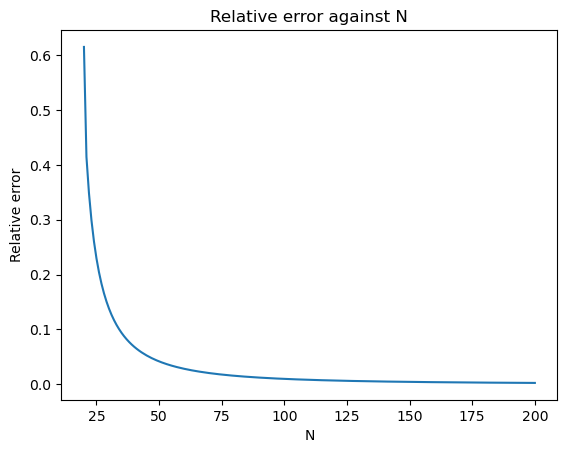

In [6]:
#Question 2d
def w_exact(x,omega):
   '''
   The exact solution of the boundary value problem
   Input: x is the domain of the problem
         omega is the parameter
   Output: the exact solution
   '''
   return (np.sin(omega)-np.sin(omega*x)-np.sin(omega*(1-x)))/np.sin(omega)

def f(x):
    '''
    function f(x) = 1
    Input: x given value
    Output: y(x) = 1
    '''
    return 1

def f(x):
    return 1

def relative_error(N,omega,f):
   '''
      Compute the relative error of the numerical solution
      Input: N is the number of subintervals
            omega is the parameter
            f is the function f(x)
      Output: the relative error
   '''
   w = BVP(N,omega,f) # solve the boundary value problem
   w_exact_list = [] # initialise the list of the exact solution
   error = np.zeros(N+1) # initialise the error vector
   for i in range(N+1): # loop over i from 0 to N
      w_exact_list.append(w_exact(i/N,omega))
      error[i] = abs(w[i]- w_exact(i / N,omega)) # compute the error
   norm_error = np.linalg.norm(error,2) # compute the 2-norm of the error vector
   norm_w_exact = np.linalg.norm(w_exact_list,2) # compute the 2-norm of the solution vector   
   return norm_error/norm_w_exact # return the relative error

# Test relative_error
import matplotlib.pyplot as plt
omega = 20 # set the parameter omega
# initialise the list of relative error
relative_error_list = []
# loop over N from 1 to 100
for N in range(20,201):
   relative_error_list.append(relative_error(N,omega,f))
# plot the relative error against N
plt.plot(range(20,201),relative_error_list)
plt.xlabel('N')
plt.ylabel('Relative error')
plt.title('Relative error against N')
plt.show()



The ratio of the 2-norm of $[ w_1 - w(x_1),\cdots,w_{N-1} - w(x_{N-1})]$ to that of $[w(x_1),\cdots,w(x_n)]$ will be smaller as N going larger. From the graph, we can know that relative error is inversely proportional to N, which means Relative error $\times$ N = constant.

## Question 3: Divide-and-conquer for tridiagonal matrices (20 marks)

Exercise 5 of Computer Lab 3 implements a divide-and-conquer strategy for the LU factorisation of matrices of dimension $n = 2^k$. This successively reduces the factorisation of a matrix to the factorisation of two matrices of half the size and is implemented via a recursive function.

**3(a)** Write a function `LUtriRec` that implements a similar recursive strategy for the LU decomposition of a tridiagonal matrix. Like `LUtri` the function should take as the vectors $\mathbf{a}$, $\mathbf{b}$ and $\mathbf{c}$ as input, output the vectors $\mathbf{l}$, $\mathbf{u}$ and $\mathbf{v}$, and avoid the use of full matrices. Check the results of `LUtriRec` by verifying that $\mathbf{L} \mathbf{U} = \mathbf{A}$ for a random tridiagonal matrix (use `np.allclose` and display the outcome).

**3(b)** Compare the computation times of `LUtriRec` and `LUtri` to draw conclusions about the efficiency of `LUtriRec`.

### Question 3: Answers

**3(a)** 

In [7]:
def LUtriRec(a,b,c):
    '''
    LU factorization of a tridiagonal matrix by recursion
    Input: a, b, c are the three diagonals of the matrix
    Output: l, u, v are the three diagonals of the LU factorization
    '''
    # Find dimension of A
    n = len(b)
    m = n // 2
    # base case
    if m == 1:
        # u_1 = b_1 
        u_0 = b[0]
        # v_1 = c_1
        v_0 = c[0]
        # solve a_2 = l_2*u_1
        l_0 = a[0]/u_0
        # solve b_2 = l_2*v_1+u_2
        u_1 = b[1] - l_0*c[0]
        # in 2x2 lower triangle matrix, there is only one l_2
        l = np.array([l_0])
        # in 2x2 upper triangle matrix, there are two elements in the diagonal with u_1 and u_2
        u = np.array([u_0, u_1])
        # in 2x2 upper triangle matrix, there is only one superdiagonal v_1
        v = np.array([v_0])
        return l, u, v # return the basic case of LU factorization of A with three diagonals    
    # recursive case
    # find the LU factorization of the upper left block of A   
    l_1, u_1, v_1 = LUtriRec(a[:m-1], b[:m], c[:m-1])
    # find medium v
    v_2 = c[m-1]
    # find medium l
    l_2 = a[m-1]/u_1[m-1]
    # copy b to b_new
    b_new = b.copy()
    # in order to solve b_0 = l_0*v_0+u_0, we need to subtract l_2*v_2 from b_0
    b_new[m] = b_new[m] - l_2*v_2
    # find the LU factorization of the lower right block of A
    l_3, u_3, v_3 = LUtriRec(a[m:], b_new[m:], c[m:]) 
    # concatenate the three diagonals
    l = np.concatenate((l_1, [l_2]))
    l = np.concatenate((l, l_3))
    u = np.concatenate((u_1, u_3))
    v = np.concatenate((v_1, [v_2]))
    v = np.concatenate((v, v_3))
    return l, u, v   # return the LU factorization of A with three diagonals 

# Test LUtriRec
# loop over demension n = 2^k with k = 1,2,3,4,5,6,7,8,9,10,11,12
for i in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    # get the random tridiagonal matrix with demension
    A, a, b, c = random_tri(i)
    # use LUtriRec to get l, u, v
    l_1,u_1,v_1 = LUtriRec(a, b, c)
    # use LUtri to get lu, u, v
    l_2,u_2,v_2 = LUtri(a, b, c)
    print("n = " + str(i))
    # use allclose to compare l, u, v get from these two methods
    print("l1 = l2: " + str(np.allclose(l_1, l_2)))
    print("u1 = u2: " + str(np.allclose(u_1, u_2)))
    print("v1 = v2: " + str(np.allclose(v_1, v_2)))
    print("")

n = 2
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 4
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 8
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 16
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 32
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 64
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 128
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 256
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 512
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 1024
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 2048
l1 = l2: True
u1 = u2: True
v1 = v2: True

n = 4096
l1 = l2: True
u1 = u2: True
v1 = v2: True



**3(b)** 

In [8]:
# Test efficiency of LUtriRec
# loop over demension n = 2^k with k = 1,2,3,4,5,6,7,8,9,10,11,12
for i in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024,2048,4096]:
    A, a, b, c = random_tri(i)
    # record the start time of LUtriRec
    start = time.time()
    # using LUtriRec factorization of A
    l, u, v = LUtriRec(a, b, c)
    # record the end time of LUtriRec
    end = time.time()
    # record the start time of LU_TRI
    start_1 = time.time()
    # using LU_TRI factorization of A
    l, u, v = LUtri(a, b, c)
    # record the end time of LU_TRI
    end_1 = time.time()
    # print the time cost by LUtriRec and LU_TRI with dimension n
    print("n = " + str(i) + ": LUtriRec = " + str(end-start) + ", LUtri = " + str(end_1-start_1))

n = 2: LUtriRec = 1.71661376953125e-05, LUtri = 1.5020370483398438e-05
n = 4: LUtriRec = 0.000194549560546875, LUtri = 6.198883056640625e-06
n = 8: LUtriRec = 0.00010752677917480469, LUtri = 9.5367431640625e-06
n = 16: LUtriRec = 0.00011587142944335938, LUtri = 1.5020370483398438e-05
n = 32: LUtriRec = 0.0002224445343017578, LUtri = 2.574920654296875e-05
n = 64: LUtriRec = 0.0004916191101074219, LUtri = 5.364418029785156e-05
n = 128: LUtriRec = 0.0009071826934814453, LUtri = 9.655952453613281e-05
n = 256: LUtriRec = 0.0017192363739013672, LUtri = 0.00016427040100097656
n = 512: LUtriRec = 0.003087282180786133, LUtri = 0.00036215782165527344
n = 1024: LUtriRec = 0.005942344665527344, LUtri = 0.0007028579711914062
n = 2048: LUtriRec = 0.016611576080322266, LUtri = 0.0014126300811767578
n = 4096: LUtriRec = 0.023392677307128906, LUtri = 0.0027844905853271484


Compared with LUtri, we can see that LUtriRec is slower than LUtri when n goes large. For example, when n = 4096, LUtriRec takes 0.023378610610961914s and LUtri takes 0.0033218860626220703s, which is 10 times larger than LUtri.

## Question 4: Lyapunov exponents of products random matrices (30 marks)

This question is motivated by the theory of chaotic dynamical systems, specifically the observation that nearby trajectories in such systems typically separate exponentially, leading to unpredictability of systems with uncertain initial conditions (such as the weather). 

A simple model for this discretises time as $t=0,1,\cdots$ and treats the separation between nearby trajectories as a vector $\mathbf{x}_t \in \mathbb{R}^n$  which evolves according to
$$ \mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}, \quad t=1,2,\cdots, \qquad \qquad (**)$$
where the $\mathbf{A}_t$ are independent random matrices. In this question we take these matrices to have independent normally distributed entries with zero mean and standard deviation $\sigma>0$.

The code below illustrates the remarkable property that $\|\mathbf{x}_t\|_p$ (for any $p$ - we will be using $p=2$ and omit it from the notation) grows exponentially in the following sense: define
$$
h_t = t^{-1} \log \| \mathbf{x}_t \|,
$$
then 
$$
\lambda_1 = \lim_{t \to \infty} h_t.
$$
is well defined and independent of the random draw of the matrices $\mathbf{A}_t$ and of $\mathbf{x}_0$ (except for a $(n-1)$-dimensional subspace). (Test this by running the code multiple times.) The number $\lambda_1$ is termed (largest) Lyapunov exponent and is a key quantity in the study of chaotic dynamical systems. 

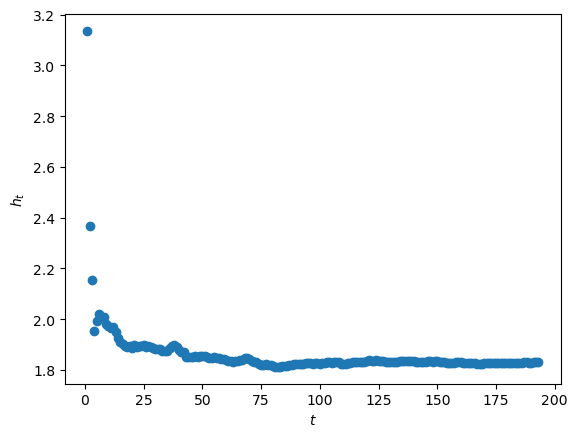

In [9]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

n = 10 # dimension of x_t
sigma = 2 # standard deviation of entries of random matrices

t_end = 200 # maximum of t

t = [k for k in range(1,t_end+1)] # list if values of t
x = np.ones(n) # initialise  x_0
h = np.zeros(len(t)) # list of h_t = t^{-1} log ||x_t|| 
for k in range(t_end):
    A = random.normal(0,sigma,(n,n)) # draw random matrix
    x = A @ x
    h[k] = np.log(np.linalg.norm(x,2))/t[k]
    #print(np.linalg.norm(x,2),t[k])


plt.plot(t,h,'o')
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.show()
    

**4(a)** The code above crashes for large $n$ because of overflow: $\| \mathbf{x}_t \|$ becomes too large for the floating point representation. This makes it unusable to estimate $\lambda_1$ accurately. To address this, consider the unit vectors $\mathbf{y}_t = \mathbf{x}_t / \| \mathbf{x}_t \|$. 

(i) Show that that they satisfy $\mathbf{y}_t = \mathbf{A}_t \mathbf{y}_{t-1} /  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$.

(ii) Show that $h_t = t^{-1} \sum_{k=1}^t \ln r_k$, where $r_t =  \| \mathbf{A}_t \mathbf{y}_{t-1} \|$, assuming that $\| \mathbf{x}_0 \| = 1$.

(iii) Write a function `LYA1` that estimates $\lambda_1$ based on (i) and (ii). The function should take $n$, $\sigma$ and $t$ as inputs and return the sequence $(h_{j})$ for $j=1,2,\cdots,t$ which converges to $\lambda_1$. Use your function to estimate $\lambda_1$ for random matrices with $n=10$ and normal entries with zero mean and standard deviation $\sigma = 2$. 

**4(b)** A more refined characterisation of the dynamics of $\mathbf{x}_t$ is provided by the full set of Lyapunov exponents $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$. These are defined by 
$$
\lambda_1 + \cdots + \lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t).
$$
Here $V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t)$ is the volume of the $k$-dimensional parallelepiped spanned by vectors $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$ each evolving according to (**) starting from linearly independent $\mathbf{x}^{(1)}_0,\cdots,\mathbf{x}^{(k)}_0$. This volume can be defined as
$$
V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = | \det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})|,
$$
where $(\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})$ are $n-k$ orthonormal vectors also orthogonal to $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$. (To see why this makes sense, think of the case $n=3$: for $k=1$ the volume is the length of $\mathbf{x}^{(1)}_t$, for $k=2$ it is the area of the parallelogram spanned by $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t)$, and for $k=3$ it is the volume of the parallelepiped spanned by  $(\mathbf{x}^{(1)}_t,\mathbf{x}^{(2)}_t,\mathbf{x}^{(3)}_t)$.)

(i) Show that 
$$
\lambda_k = \lim_{t \to \infty} t^{-1} \ln |r_{kk}|, \qquad \qquad (***)
$$ 
where $r_{kk}$ is the $k$th diagonal entry of $\mathbf{R}$, the upper triangular matrix in the QR factorisation of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$. (Hint: consider the QR factorisation of $[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$.)

(ii) Write an algorithm for the estimation of $\lambda_k, \, k=1,\cdots, n$, based on (***). For stability, the algorithm should not evaluate $\mathbf{A}_t \cdots \mathbf{A}_1$. (Hint: first show that $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$, where $\mathbf{Q}_j \mathbf{R}_j$ is the QR factorisation of $\mathbf{A}_j \mathbf{Q}_{j-1}$, with $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$.)

(iii) Implement your algorithm in (iii) as a function `LYAall`. For the matrices with normal entries there is a lovely closed-form formula:
$$
\lambda_k = \log \sigma + \tfrac{1}{2} \left( \log 2 + \Psi( (n-k+1)/2) \right),
$$
where $\Psi$ is the digamma function (available as `scipy.special.digamma` in Python). Write a code that produces a table showing the numerical estimates of $\lambda_k$, the exact values  and the relative errors (in percent) for fixed $n$, $\sigma$ and $t$. Show your table for $n=10, \, \sigma = 2, \, t = 10000$.

### Question: Answers

**4(a)(i)** 

Let's start by $\mathbf{y}_t$,
$$
\mathbf{y}_t = \frac{\mathbf{x}_t} { \| \mathbf{x}_t \|} = \frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\| \mathbf{A}_t \mathbf{x}_{t-1} \|},
$$ 
according to $ \mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}, \quad t=1,2,\cdots .$We know that $\| \mathbf{x}_{t-1} \| = \sqrt{\mathbf{x}_{t-1}^T \mathbf{x}_{t-1}}$, which is a scalar.Thus,
$$\mathbf{y}_t = \frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\| \mathbf{A}_t \mathbf{x}_{t-1} \| } = \frac{ \frac{\mathbf{A}_t \mathbf{x}_{t-1}}{\| x_{t-1} \|}}{\frac{\| \mathbf{A}_t \mathbf{x}_{t-1} \|}{\| x_{t-1} \|} } = \frac{\mathbf{A}_t \frac{\mathbf{x}_{t-1}}{\| x_{t-1} \|}}{\| \mathbf{A}_t \frac{\mathbf{x}_{t-1}}{\| x_{t-1} \|} \| }.$$
Here, we can move $\frac{1}{\| x_{t-1} \|}$ into $\| \mathbf{A}_t \mathbf{x}_{t-1} \| $, since $\| x_{t-1} \|$ is a scalar. 
Therefore,
$$
\mathbf{y}_t = \frac{\mathbf{A}_t \frac{\mathbf{x}_{t-1}}{\| x_{t-1} \|}}{\| \mathbf{A}_t \frac{\mathbf{x}_{t-1}}{\| x_{t-1} \|} \| } =  \frac{\mathbf{A}_t \mathbf{y}_{t-1} }{  \| \mathbf{A}_t \mathbf{y}_{t-1} \|},
$$ 
since $\mathbf{y}_{t-1} = \frac { \mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|}$ by the definition.

**4(a)(ii)** 
To prove $h_t = t^{-1} \sum_{k=1}^t \ln r_k$, let's start by
$$
t^{-1} \sum_{k=1}^t \ln r_k = t^{-1} \ln \prod_{k=1}^t r_k =  t^{-1}  \ln (\| \mathbf{A}_1 \mathbf{y}_{0} \| \| \mathbf{A}_t \mathbf{y}_{1} \| \cdots \| \mathbf{A}_t \mathbf{y}_{t-1} \| )= t^{-1} \ln (\| \mathbf{A}_1 \frac{\mathbf{x}_0} { \| \mathbf{x}_0 \|} \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \|).
$$
Here, we assume $\| \mathbf{x}_0 \| = 1$, so
$$
\| \mathbf{A}_1 \frac{\mathbf{x}_0} { \| \mathbf{x}_0 \|} \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| = \| \mathbf{A}_1 \frac{\mathbf{x}_0} { 1} \| \| \mathbf{A}_t \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| =  \| \mathbf{x}_1 \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \|,
$$
the definition that $\mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}$. Since $\| \mathbf{x}_1 \|$ is a scalar, we can move it out of $\| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \|$.Thus, we get
$$
\| \mathbf{x}_1 \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| = \| \mathbf{x}_1 \| \frac{\| \mathbf{A}_2 \mathbf{x}_1  \|}{ \| \mathbf{x}_1 \|} \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| =  \| \mathbf{A}_2 \mathbf{x}_1  \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \|. 
$$
We can keep doing the same thing as above, then we will finally get 
$$
\| \mathbf{A}_1 \frac{\mathbf{x}_0} { \| \mathbf{x}_0 \|} \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| = \| \mathbf{A}_t \mathbf{x}_{t-1} \| = \| \mathbf{x}_{t} \|.
$$
Thus, 
$$
t^{-1} \sum_{k=1}^t \ln r_k = t^{-1} \ln (\| \mathbf{A}_1 \frac{\mathbf{x}_0} { \| \mathbf{x}_0 \|} \| \| \mathbf{A}_2 \frac{\mathbf{x}_1} { \| \mathbf{x}_1 \|} \| \cdots \| \mathbf{A}_t \frac{\mathbf{x}_{t-1}} { \| \mathbf{x}_{t-1} \|} \| )= t^{-1} \ln (\| \mathbf{x}_{t}\|) = h_t
$$


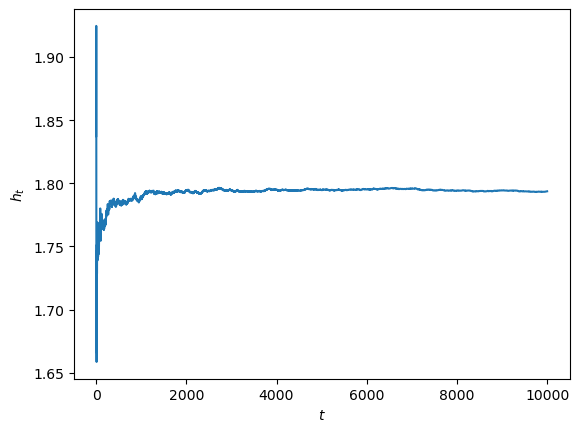

The approximate Lyapunov exponent is 1.7936494306123065


In [10]:
# Question 4a(iii)
def LYA1(n, sigma, t):
    '''
    Compute the Lyapunov exponent of a random matrix
    Input: n is the dimension of the matrix
           sigma is the standard deviation of the entries of the matrix
           t is the number of iterations
    Output: the sequence of Lyapunov exponent
    '''
    # initialise y_0 with ||y_0|| = 1
    y = np.zeros(n)
    y[0] = 1
    # initialise sum_log
    sum_log_rk = 0
    # initialise the list of h_t
    h_list = []
    for k in range(1,t+1):
        # draw random matrix
        A = random.normal(0,sigma,(n,n)) # draw random matrix
        # get ||A_k y_{k-1}||
        y = A @ y
        # update sum_log
        sum_log_rk += np.log(np.linalg.norm(y,2))
        # add h_t to the list
        h_list.append(sum_log_rk/k)
        # get y_k
        y = y/np.linalg.norm(y,2)
    return h_list # return the Lyapunov exponent

# Test LYA1
n = 10 # dimension of x_t
sigma = 2 # standard deviation of entries of random matrices
t = 10000 # maximum of t
h_list = LYA1(n, sigma, t) # compute each h_i
plt.plot(range(1,t+1),h_list)
plt.xlabel('$t$')
plt.ylabel('$h_t$')
plt.show()
# find the approximate Lyapunov expoent by the last item of h_i
print("The approximate Lyapunov exponent is " + str(h_list[-1]))


**4(b)(i)** 
To show that
$$
\lambda_k = \lim_{t \to \infty} t^{-1} \ln |r_{kk}|, \qquad \qquad (***)
$$ 
where $r_{kk}$ is the $k$th diagonal entry of $\mathbf{R}$, the upper triangular matrix in the QR factorisation of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$. We can start by considering the QR factorisation of $[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$. Here, we know that $ \mathbf{x}_{t} = \mathbf{A}_t \mathbf{x}_{t-1}$ Thus, by doing this recursively, we can get $\mathbf{x}^{(k)}_t = \mathbf{QR} \mathbf{x}^{(k)}_0.$ Since $\mathbf{x}^{(k)}_0 = \mathbf{e}^k$ with only 1 in k-th row and 0 in others, for $[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t]$, we can rewrite it as $\mathbf{\mathbf{QRe^1}, \cdots , \mathbf{QRe^k}}$, which is QR factorisation. What we need to deal here is the last part $[\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$. Here, we know that, the (k+1)-th to n-th part of Q is orthonormal vectors also orthogonal to $\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t$. Therefore, we can let $[\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}]$ = $[\mathbf{q}^{(k+1)},\cdots, \mathbf{q}^{(n)}]$. Finally, our QR factorisation of the matrix product will be
$$
[\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}] = [\mathbf{\mathbf{QRe^1}, \cdots , \mathbf{QRe^k}}, \mathbf{q}^{(k+1)},\cdots, \mathbf{q}^{(n)}] = \mathbf{Q} [ \mathbf{r}^{(1)},\cdots, \mathbf{r}^{(k)},  \mathbf{e}^{(k+1)},\cdots, \mathbf{e}^{(n)}],
$$
where $\mathbf{r}^{(k)} $ is the k-th column of matrix R. We know that
$$
\lambda_1 + \cdots + \lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) = \lim_{t \to \infty} t^{-1} \ln| \det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})|.
$$
Here,
$$
\det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)}) = \det \mathbf{Q} [ \mathbf{r}^{(1)},\cdots, \mathbf{r}^{(k)},  \mathbf{e}^{(k+1)},\cdots, \mathbf{e}^{(n)}] = \det \mathbf{Q} \det [ \mathbf{r}^{(1)},\cdots, \mathbf{r}^{(k)},  \mathbf{e}^{(k+1)},\cdots, \mathbf{e}^{(n)}].
$$
We know that the det of determinant of a orthonormal matrix is $\pm 1$ and determinant of an upper triangular matrix is the multiplication of its diagnoal elements, so 
$$
|\det (\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t,\mathbf{u}^{(1)},\cdots,\mathbf{u}^{(n-k)})| = |\pm 1 \times r_{11} \cdots r_{kk} | = |r_{11} \cdots r_{kk}|,
$$
where $r_{kk}$ is the $k$th diagonal entry of $\mathbf{R}$, the upper triangular matrix in the QR factorisation of the matrix product $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q} \mathbf{R}$.
Therefor, we can get $\lambda_k$ by
$$
\lambda_k = \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k)}_t) -  \lim_{t \to \infty} t^{-1} \ln  V(\mathbf{x}^{(1)}_t,\cdots,\mathbf{x}^{(k-1)}_t) = \lim_{t \to \infty} t^{-1} \ln |r_{11} \cdots r_{kk}| - \lim_{t \to \infty} t^{-1} \ln |r_{11} \cdots r_{k-1k-1}| = \lim_{t \to \infty} t^{-1} \ln |r_{kk}|
$$
due to the property of $ln()$ fuunction.

**4(b)(ii)**
To show that $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$,where $\mathbf{Q}_j \mathbf{R}_j$ is the QR factorisation of $\mathbf{A}_j \mathbf{Q}_{j-1}$, with $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$. Let's prove it by induction. The basic case is shown as $\mathbf{A}_1 = \mathbf{Q}_1 \mathbf{R}_1$, which is exactly true. Assume that $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$, we need to prove it is true for t+1. Therefore, 
$$
\mathbf{A}_{t+1}  \mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{A}_{t+1} \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1 =\mathbf{Q}_{t+1} \mathbf{R}_{t+1} \mathbf{R}_{t-1}\cdots \mathbf{R}_1 ,
$$
since $\mathbf{Q}_{t+1} \mathbf{R}_{t+1}$ is the QR factorisation of $\mathbf{A}_{t+1} \mathbf{Q}_{t}$. Since basic base and normal case are both correct, $\mathbf{A}_t \cdots \mathbf{A}_1 = \mathbf{Q}_t \mathbf{R}_t \mathbf{R}_{t-1}\cdots \mathbf{R}_1$ is true.

The code is based on the following pseudocode:

**LYAall:**

*Input*: $\mathbf{n}$ the dimension of $\mathbf{x}$, $\sigma$ standard deviation of entries of random matrices and t the number of iterations 

*Output*: $\lambda_1, \cdots \lambda_k$ the eatimation of $\lambda_k, \, k=1,\cdots, n $

[1] $\mathbf{A_1} = $  random $n \times n$ matrix with zero mean and standard deviation $\sigma$

[2] $\mathbf{Q}_1, \mathbf{R}_1 = QR(\mathbf{A}_1)$ # the initial case 

[3] $\mathbf{r} = \ln(|$the array of diagonal of $\mathbf{R}_1|)$ # let r be the array of ln of each diagnoal element

[3] For $k = 2, \dots, t$

[4] $\qquad \mathbf{A_k} = $  random $n \times n$ matrix with zero mean and standard deviation $\sigma$

[5] $\qquad \mathbf{Q}_k, \mathbf{R}_k = QR(\mathbf{A}_k \mathbf{Q}_{k-1})$ # get Q_k, R_k

[6] $\qquad \mathbf{r} = \ln (|$the array of  diagonal of $\mathbf{R}_k|) +\mathbf{r}$ # the diagonal of two upper triangular matrix is the product of their diagonal and $\ln(diagonal \times diagonal) = \ln(diagonal) + \ln(diagonal)$   

[7] End For

[8] For $k = 1, \dots, n$

[9] $\qquad \lambda_k = t^{-1} |r_k|$ #get each $\lambda$ by the formula,where $r_k$ is the k-th elements of $\mathbf{r}$

[10] End For

In [12]:
# Question 4b(iii)
def LYAall(n, sigma, t):
    '''
    Compute the full set of Lyapunov exponent of a random matrix
    Input: n is the dimension of the matrix
           sigma is the standard deviation of the entries of the matrix
           t is the number of iterations
    Output: lambda the sequence of lambda
    '''
    A = random.normal(0,sigma,(n,n)) # draw random matrix
    Q, R = np.linalg.qr(A) # QR factorization of A_1
    r = np.log(abs(np.diag(R))) # extract the diagonal of R
    lambda_list = [] # initialise the list of lambda
    for i in range(t-1):
        A = random.normal(0,sigma,(n,n))
        Q, R = np.linalg.qr(A @ Q)
        r = np.log(abs(np.diag(R))) + r # update the diagonal of R   
    for i in range(n):
        lambda_list.append(abs(np.abs(r[i])/t))
    return lambda_list # return the full set of Lyapunov exponent

import scipy.special
# Test LYAall
# actual Lyapunov exponent
n = 10 # dimension of x_t
sigma = 2 # standard deviation of entries of random matrices
t = 10000 # maximum of t
lambda_list = LYAall(n, sigma, t) # find the approxmaite lambda list
lambda_actual = np.zeros(n) # initialise the actual lambda list
for i in range(1,n+1):
    # get the actual lambda list by (ln(sigma) + (ln(2)+ Psi((n-i+1)/2))/2
    lambda_actual[i-1] = np.log(sigma) + 1/2*(np.log(2) + scipy.special.digamma((n-i+1)/2))

# initialise the relative error list
relative_error_list = []
for i in range(n):
    # get each relative error
    relative_error_list.append(100* abs(lambda_list[i]-lambda_actual[i])/lambda_actual[i])
import pandas as pd
from pandas import DataFrame
# use dataframe to make these three lists become a table
f1 = DataFrame(data = lambda_list, index = range(1,11), columns = ['Approximate Lyapunov exponent'])
f2 = DataFrame(data = lambda_actual, index = range(1,11), columns = ['Actual Lyapunov exponent'])
f3 = DataFrame(data = relative_error_list,index = range(1,11),  columns = ['Relative error(%)'])
# concate three lists
f = pd.concat([f1,f2,f3], axis = 1)
# print the table
print(f)

    Approximate Lyapunov exponent  Actual Lyapunov exponent  Relative error(%)
1                        1.788408                  1.792780           0.243846
2                        1.733162                  1.734156           0.057308
3                        1.669106                  1.667780           0.079524
4                        1.585438                  1.591299           0.368315
5                        1.498692                  1.501113           0.161303
6                        1.391400                  1.391299           0.007218
7                        1.249382                  1.251113           0.138376
8                        1.058443                  1.057966           0.045107
9                        0.755340                  0.751113           0.562754
10                       0.067884                  0.057966          17.110232
